C:\Users\Avikgna Linganathan\AppData\Local\Temp\ipykernel_20144\3056613779.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[percent_household_income_col].fillna(merged_df[percent_household_income_col].mean(), inplace=True)
C:\Users\Avikgna Linganathan\AppData\Local\Temp\ipykernel_20144\3056613779.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because

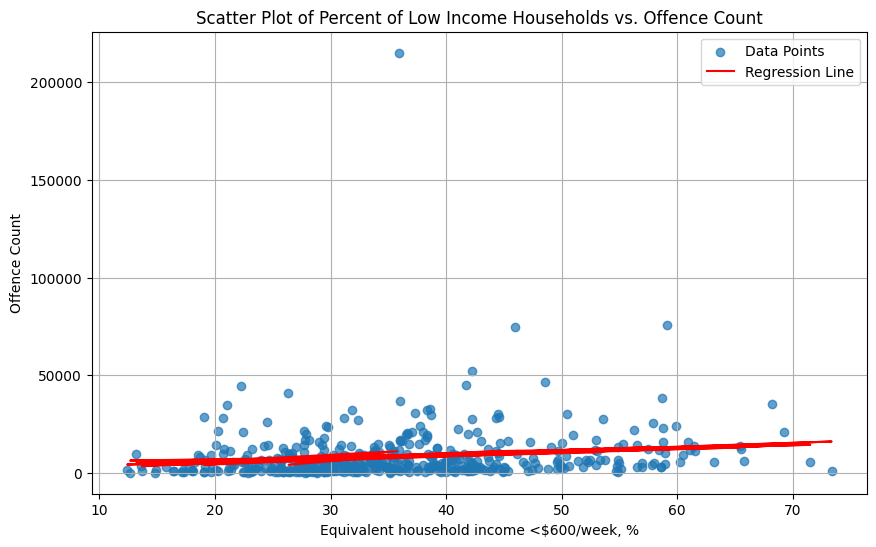

Linear Regression Coefficients: [ 248.78975173 -113.33056147]
Intercept: 3874.2899458816073
R² Score: 0.024560956814689616
Merged data saved as 'merged_suburb_incomes_offenses.csv'


In [12]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def extract_suburb_type(community_name):
    regex_pattern = r'\((Suburb|suburb)\)'
    matches = re.findall(regex_pattern, community_name)
    return matches[0] if matches else None

def suburb_incomes_vs_offences(): 
    communities_df = pd.read_csv('imputed_data_communities.csv')
    communities_df['Type'] = communities_df['Community Name'].apply(extract_suburb_type)
    suburbs_df = communities_df[communities_df['Type'] == 'Suburb'].copy()
    
    percent_household_income_col = 'Equivalent household income <$600/week, %'
    percent_personal_income_col = 'Personal income <$400/week, %'
    
    suburbs_df = suburbs_df[['Community Name', percent_household_income_col, percent_personal_income_col]]
    
    suburb_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')
    
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_offences_df['Suburb/Town Name'] = suburb_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    suburb_offenses_grouped = suburb_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()
    
    merged_df = pd.merge(suburbs_df, suburb_offenses_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')
    merged_df['Community Name'] = merged_df['Community Name'].str.lower()
    merged_df = merged_df.drop(columns=['Suburb/Town Name'])
    
    merged_df[percent_household_income_col].fillna(merged_df[percent_household_income_col].mean(), inplace=True)
    merged_df['Offence Count'].fillna(merged_df['Offence Count'].mean(), inplace=True)
    
    X = merged_df[[percent_household_income_col, percent_personal_income_col]]  # Independent variables
    y = merged_df['Offence Count']  # Dependent variable


    regressor = LinearRegression()
    regressor.fit(X, y)


    # Plot scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df[percent_household_income_col], merged_df['Offence Count'], alpha=0.7, label='Data Points')
    
    # Plot the regression line (here based on household income)
    plt.plot(merged_df[percent_household_income_col], regressor.predict(X), color='red', label='Regression Line')

    plt.title('Scatter Plot of Percent of Low Income Households vs. Offence Count')
    plt.xlabel('Equivalent household income <$600/week, %')
    plt.ylabel('Offence Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print regression results
    print(f"Linear Regression Coefficients: {regressor.coef_}")
    print(f"Intercept: {regressor.intercept_}")
    print(f"R² Score: {regressor.score(X, y)}")

    # Save the merged dataset to a new CSV file
    merged_df.to_csv('merged_suburb_incomes_offenses.csv', index=False)
    
    # Call the function to execute
    suburb_incomes_vs_offences()


C:\Users\Avikgna Linganathan\AppData\Local\Temp\ipykernel_20144\1204187333.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  category_df[percent_household_income_col].fillna(category_df[percent_household_income_col].mean(), inplace=True)
C:\Users\Avikgna Linganathan\AppData\Local\Temp\ipykernel_20144\1204187333.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

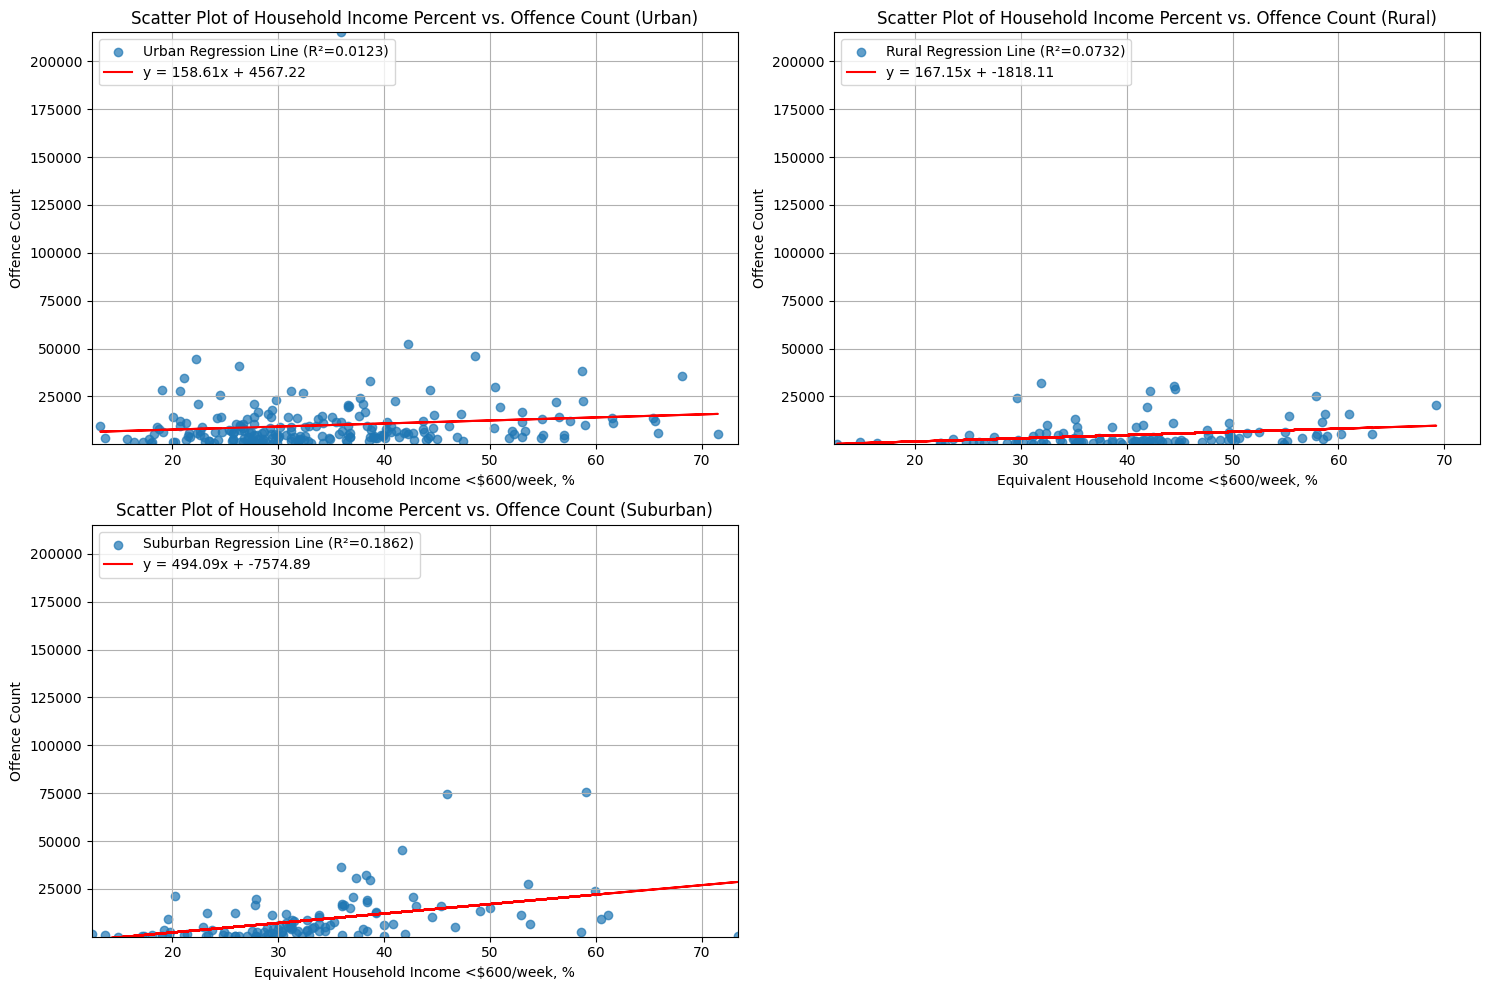

Correlation coefficient between Equivalent household income <$600/week, % and Offence Count for Urban: 0.1111
Correlation coefficient between Equivalent household income <$600/week, % and Offence Count for Rural: 0.2705
Correlation coefficient between Equivalent household income <$600/week, % and Offence Count for Suburban: 0.4315


In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def extract_suburb_type(community_name):
    regex_pattern = r'\((Suburb|suburb)\)'
    matches = re.findall(regex_pattern, community_name)
    return matches[0] if matches else None

def suburb_income_vs_offences():
    communities_df = pd.read_csv('imputed_data_communities_new.csv')
    communities_df['Type'] = communities_df['Community Name'].apply(extract_suburb_type)
    suburbs_df = communities_df[communities_df['Type'] == 'Suburb'].copy()
    
    percent_household_income_col = 'Equivalent household income <$600/week, %'
    suburbs_df = suburbs_df[['Community Name', percent_household_income_col]]

    suburbs_category_df = pd.read_csv('suburb_analysis.csv')
    suburbs_category_df = suburbs_category_df[['Community Name', 'Category']]
    
    suburb_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')
    
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_offences_df['Suburb/Town Name'] = suburb_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    suburb_offences_grouped = suburb_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()
    
    merged_suburbs_df = pd.merge(suburbs_df, suburb_offences_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')
    merged_suburbs_df['Community Name'] = merged_suburbs_df['Community Name'].str.lower()
    merged_suburbs_df = merged_suburbs_df.drop(columns=['Suburb/Town Name'])
    
    # Second merge with suburbs category data
    merged_suburbs_df = pd.merge(merged_suburbs_df, suburbs_category_df, on='Community Name', how='left')  
    merged_suburbs_df.to_csv('merged_suburb_income_offenses_with_categories.csv', index=False)

    # Create scatter plots for each category
    categories = merged_suburbs_df['Category'].unique()
    
    # Create a figure for the scatter plots
    plt.figure(figsize=(15, 10))
    
    x_min = merged_suburbs_df[percent_household_income_col].min()
    x_max = merged_suburbs_df[percent_household_income_col].max()
    y_min = merged_suburbs_df['Offence Count'].min()
    y_max = merged_suburbs_df['Offence Count'].max()

    for category in categories:
        category_df = merged_suburbs_df[merged_suburbs_df['Category'] == category]
        
        plt.subplot(2, 2, list(categories).index(category) + 1)  
        plt.scatter(category_df[percent_household_income_col], category_df['Offence Count'], alpha=0.7, label='Data Points')

        category_df[percent_household_income_col].fillna(category_df[percent_household_income_col].mean(), inplace=True)
        category_df['Offence Count'].fillna(category_df['Offence Count'].mean(), inplace=True)
        
        # Linear regression with sklearn
        X = category_df[[percent_household_income_col]].values.reshape(-1, 1) 
        y = category_df['Offence Count'].values
        
        model = LinearRegression()
        model.fit(X, y)
        
        regression_line = model.predict(X)
        
        plt.plot(category_df[percent_household_income_col], regression_line, color='red', label=f'Regression Line (R²={model.score(X, y):.4f})')
        
        equation_str = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"
        
        plt.legend([f'{category} Regression Line (R²={model.score(X, y):.4f})', equation_str], loc="upper left")
        
        # Plot settings
        plt.title(f'Scatter Plot of Household Income Percent vs. Offence Count ({category})')
        plt.xlabel('Equivalent Household Income <$600/week, %')
        plt.ylabel('Offence Count')
        plt.grid(True)
        
        
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

    
    for category in categories:
        category_df = merged_suburbs_df[merged_suburbs_df['Category'] == category]
        correlation = category_df[percent_household_income_col].corr(category_df['Offence Count'])
        print(f"Correlation coefficient between {percent_household_income_col} and Offence Count for {category}: {correlation:.4f}")

suburb_income_vs_offences()
